# Final Project - Walkability Index
### By Shayne Lada

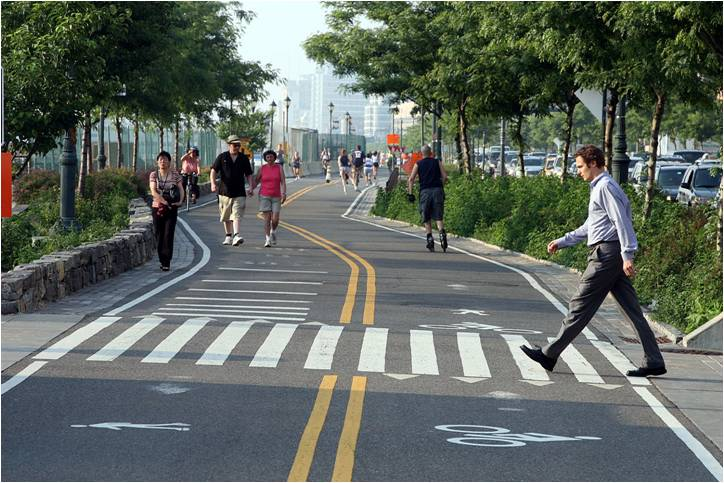

In [37]:
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
df = pd.read_csv('./data/Walkability.csv', sep = ',')

In [38]:
df_filtered = df.drop(columns = ['GEOID10', 'GEOID20', 'TRACTCE', 'BLKGRPCE', 'CSA','CSA_Name', 'CBSA','CBSA_POP', 'CBSA_Name', 'CBSA_EMP', 'CBSA_WRK', 'CountHU', 'HH','Ac_Water','Ac_Land','Ac_Unpr','D2A_JPHH','D2B_E5MIX','D2B_E5MIXA','D2C_TRPMX1','D2C_TRPMX2','D2C_TRIPEQ','D3A','D3AAO','D3AMM','D3APO','D3BAO','D3BMM3','D3BMM4','D3BPO3','D3BPO4','D4B025','D4B050','D4C','D4D','D4E'])
df_filtered.describe()
#There was a lot of columns in this data that had no index so I removed any that weren't clear what they were depicting as
#well as any unnecesarry ones.

,OBJECTID,STATEFP,COUNTYFP,Ac_Total,TotPop,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,...,D2C_WREMLX,D3B,D4A,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,220740.000000,220740.000000,2.207400e+05,220740.000000,220740.00000,220740.000000,220740.000000,220740.000000,220740.000000,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,28.623190,85.697449,1.103567e+04,1479.863804,0.59474,48.126511,0.092874,181.123960,0.328227,...,0.293445,78.256064,-57132.809682,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466015e+07
std,63722.293548,16.386075,98.818946,1.588982e+05,987.862242,0.10610,83.669015,0.136020,146.710107,0.151983,...,0.315979,83.199666,49684.780296,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.429023e+08
min,1.000000,1.000000,1.000000,1.096136e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,13.000000,29.000000,1.231824e+02,889.000000,0.54400,5.000000,0.010381,90.000000,0.217391,...,0.000837,13.277150,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,29.000000,61.000000,3.394946e+02,1265.000000,0.59500,21.000000,0.044010,146.000000,0.319574,...,0.151156,60.496455,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,42.000000,109.000000,2.325991e+03,1816.000000,0.64800,57.000000,0.115529,231.000000,0.429613,...,0.551685,116.505177,340.640000,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,78.000000,840.000000,4.055649e+07,55407.000000,1.00000,3834.000000,1.000000,15285.000000,1.000000,...,1.000000,5289.518414,1207.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.640000e+11


In [39]:
df_filtered.isna().sum()
#Within the remaining columns there were no nulls!

OBJECTID        0
STATEFP         0
COUNTYFP        0
Ac_Total        0
TotPop          0
P_WrkAge        0
AutoOwn0        0
Pct_AO0         0
AutoOwn1        0
Pct_AO1         0
AutoOwn2p       0
Pct_AO2p        0
Workers         0
R_LowWageWk     0
R_MedWageWk     0
R_HiWageWk      0
R_PCTLOWWAGE    0
TotEmp          0
E_LowWageWk     0
E_MedWageWk     0
E_HiWageWk      0
E_PctLowWage    0
D2B_E8MIX       0
D2B_E8MIXA      0
D2A_EPHHM       0
D2R_JOBPOP      0
D2R_WRKEMP      0
D2A_WRKEMP      0
D2C_WREMLX      0
D3B             0
D4A             0
D2A_Ranked      0
D2B_Ranked      0
D3B_Ranked      0
D4A_Ranked      0
NatWalkInd      0
Shape_Length    0
Shape_Area      0
dtype: int64

In [40]:
df_filtered["Fips"] = df_filtered['STATEFP'].astype(str) + df["COUNTYFP"].astype(str)
df_filtered.head()
#Combining the state fips column with the county fips column to create a normal fips code column that is useable in tableau

,OBJECTID,STATEFP,COUNTYFP,Ac_Total,TotPop,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,...,D3B,D4A,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Fips
0,1,48,113,73.595028,1202,0.549,69,0.163121,39,0.092199,...,115.981747,362.10,6,14,15,17,14.000000,3110.360820,297836.0831,48113
1,2,48,113,119.829909,710,0.466,0,0.000000,168,0.410758,...,80.145600,718.84,3,10,12,14,10.833333,3519.469110,484945.1466,48113
2,3,48,113,26.367053,737,0.811,19,0.057751,143,0.434650,...,24.272717,398.31,1,1,7,17,8.333333,1697.091802,106705.9281,48113
3,4,48,113,119.060687,904,0.638,0,0.000000,43,0.111979,...,141.604424,386.24,16,10,17,17,15.666667,2922.609204,481828.4303,48113
4,5,48,113,169.927211,948,0.506,5,0.014577,67,0.195335,...,65.307963,638.37,4,7,11,14,10.166667,3731.971773,687684.7752,48113


In [41]:
df_filtered['Pct_Low_Wage']= df_filtered['R_LowWageWk'] / df_filtered['Workers']
df_filtered['Pct_Med_Wage']= df_filtered['R_MedWageWk'] / df_filtered['Workers']
df_filtered['Pct_Hi_Wage']= df_filtered['R_HiWageWk'] / df_filtered['Workers']
# Three new columns calculating the percent of each wage group of workers

In [44]:
df_filtered.corr()
#Correlation between each column

,OBJECTID,STATEFP,COUNTYFP,Ac_Total,TotPop,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Pct_Low_Wage,Pct_Med_Wage,Pct_Hi_Wage
OBJECTID,1.000000,0.571325,-0.254159,-0.010676,-0.114937,-0.029425,0.078040,0.113013,-0.057304,-0.004263,...,-0.016320,-0.017404,-0.084848,-0.069625,-0.086151,0.010062,-0.010677,0.061675,-0.023325,-0.010216
STATEFP,0.571325,1.000000,0.216324,-0.013350,-0.048606,-0.037030,0.033317,0.054730,-0.033544,-0.012387,...,-0.051751,-0.066703,-0.080072,-0.123554,-0.134779,0.009715,-0.013352,0.031073,-0.032925,0.009769
COUNTYFP,-0.254159,0.216324,1.000000,0.008676,0.011567,0.008733,-0.041117,-0.028440,0.006792,0.012567,...,-0.000154,-0.032648,-0.020536,-0.084349,-0.066454,0.012106,0.008677,0.084143,0.068765,-0.084793
Ac_Total,-0.010676,-0.013350,0.008676,1.000000,-0.020718,-0.025583,-0.011032,0.013395,-0.035550,-0.039595,...,0.009021,-0.008217,-0.104770,-0.057172,-0.079904,0.735932,1.000000,0.053161,0.006634,-0.027641
TotPop,-0.114937,-0.048606,0.011567,-0.020718,1.000000,0.059469,0.117988,-0.108947,0.559650,-0.114681,...,-0.018882,0.191752,-0.060887,-0.069294,-0.030031,-0.017066,-0.020722,-0.154490,-0.112586,0.146056
P_WrkAge,-0.029425,-0.037030,0.008733,-0.025583,0.059469,1.000000,0.104144,0.090171,0.110822,0.132346,...,0.067162,0.088603,0.203012,0.209013,0.247885,-0.111882,-0.025589,-0.117126,-0.073741,0.102549
AutoOwn0,0.078040,0.033317,-0.041117,-0.011032,0.117988,0.104144,1.000000,0.820085,0.261912,0.120278,...,0.028550,0.053584,0.193381,0.304581,0.284376,-0.101651,-0.011035,0.053429,0.049560,-0.057995
Pct_AO0,0.113013,0.054730,-0.028440,0.013395,-0.108947,0.090171,0.820085,1.000000,0.025270,0.129805,...,0.022440,-0.031333,0.258399,0.355445,0.323232,-0.103648,0.013395,0.188110,0.164064,-0.196843
AutoOwn1,-0.057304,-0.033544,0.006792,-0.035550,0.559650,0.110822,0.261912,0.025270,1.000000,0.549900,...,0.067090,0.198876,0.131674,0.106718,0.179842,-0.101410,-0.035558,-0.040547,-0.000262,0.017702
Pct_AO1,-0.004263,-0.012387,0.012567,-0.039595,-0.114681,0.132346,0.120278,0.129805,0.549900,1.000000,...,0.094161,0.036463,0.328133,0.251483,0.322631,-0.169769,-0.039603,0.199644,0.229386,-0.247841


In [42]:
print(df_filtered['NatWalkInd'].min())
df_filtered['NatWalkInd'].max()
# The range of values for the National Walkability Index is 1-20

1.0


20.0

array([[<AxesSubplot:title={'center':'NatWalkInd'}>]], dtype=object)

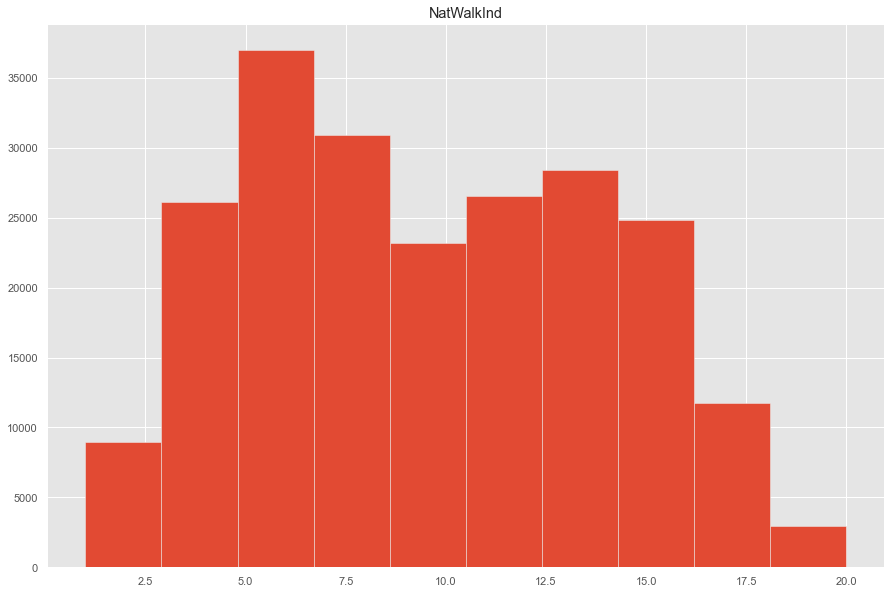

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_filtered.hist(column='NatWalkInd', figsize=(15,10))
#Showing the distribution of the National Walkability Index scores

In [45]:
average_Walkability = df_filtered[['Fips','NatWalkInd']].groupby('Fips', as_index=False).mean()
average_Walkability.sort_values(by='NatWalkInd', ascending=False).head(10)
# The average Walkability Index score for each state by their fip codes. Fips code 675, which is San Fransisco, has the highest average score.

,Fips,NatWalkInd
2968,675,15.957258
2656,51610,15.812500
2654,51600,15.666667
1972,4151,15.415547
960,2525,14.936791
1986,42101,14.833583
2666,51678,14.666667
2663,51660,14.648148
2642,51510,14.511006
3093,831,14.462231


In [54]:
auto_own_walkability = df_filtered[['Pct_AO2p','NatWalkInd']].groupby('NatWalkInd', as_index=False).mean()
auto_own_walkability.sort_values(by='NatWalkInd', ascending=False).head(10)
# Correlation between the National Walkability Index score and the percent of people who own automobiles. In genereal, a higher walkability score correlates to a lower percentage of auto owners.

,NatWalkInd,Pct_AO2p
114,20.000000,0.295124
113,19.833333,0.311312
112,19.666667,0.312278
111,19.500000,0.300869
110,19.333333,0.312923
109,19.166667,0.315216
108,19.000000,0.341750
107,18.833333,0.350746
106,18.666667,0.332357
105,18.500000,0.380863


In [56]:
average_auto_own = df_filtered[['Pct_AO2p','D4A_Ranked']].groupby('D4A_Ranked', as_index=False).mean()
average_auto_own.sort_values(by='Pct_AO2p', ascending=False).head(10)
# The percent of people in the block group that own automobiles for each rank of the predicted likelyhood of carpooling in the area. 
# The carpooling predictions (D4A) are ranked on a scale of 1-20 in D4A_Ranked.
# 1, the rank with the highest amount of carpooling, has the highest percentage of auto owners. 

,D4A_Ranked,Pct_AO2p
0,1,0.633442
1,13,0.611652
2,14,0.588976
3,15,0.561750
4,16,0.520350
5,17,0.468893
6,18,0.412310
7,19,0.358635
8,20,0.356358


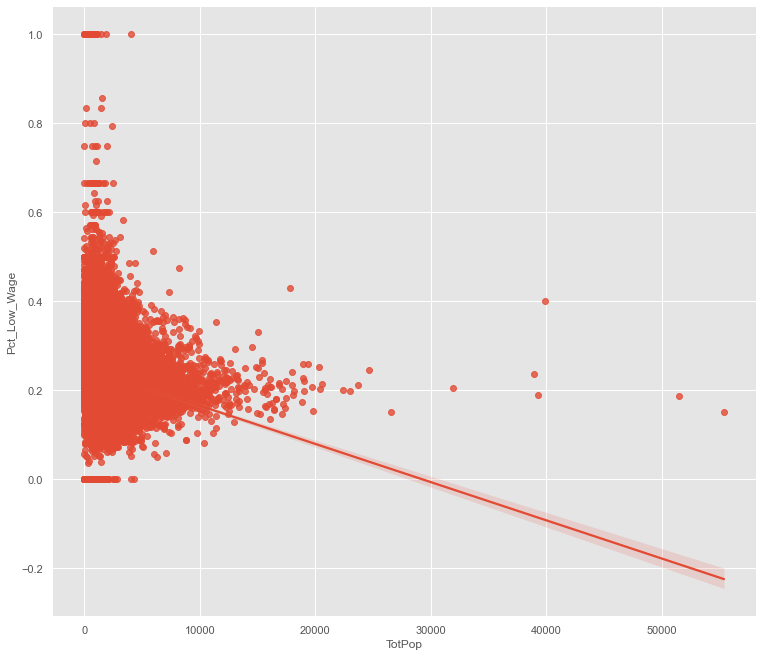

In [48]:
g = sns.lmplot(x='TotPop', y='Pct_Low_Wage', data=df_filtered)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

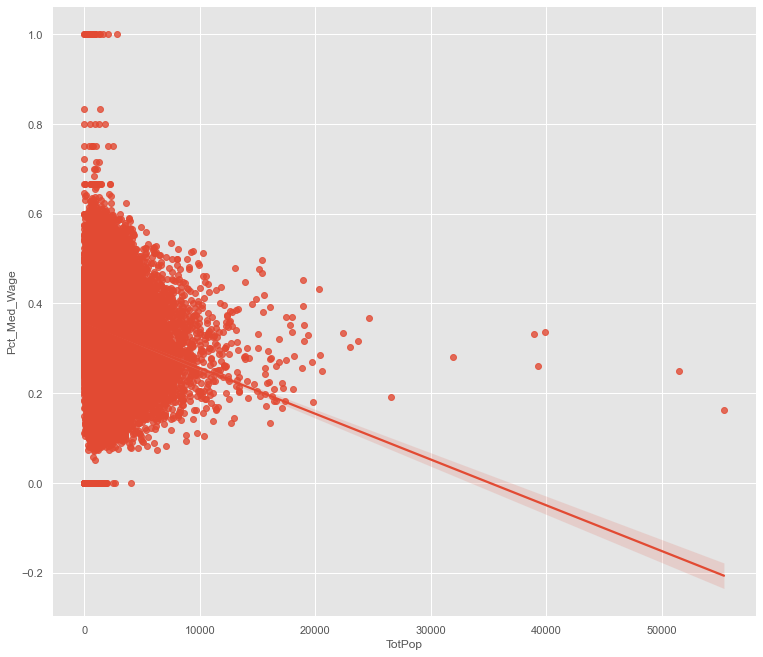

In [49]:
g = sns.lmplot(x='TotPop', y='Pct_Med_Wage', data=df_filtered)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

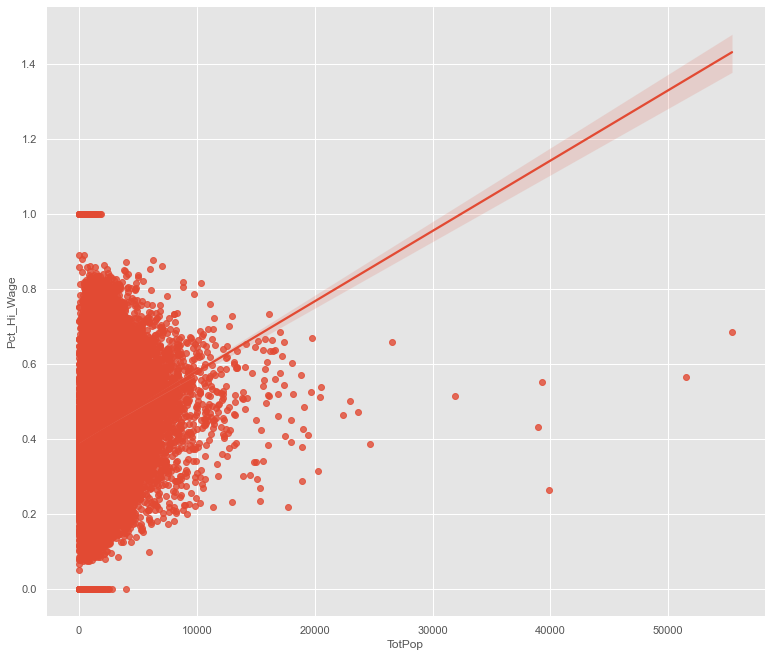

In [50]:
g = sns.lmplot(x='TotPop', y='Pct_Hi_Wage', data=df_filtered)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

In [ ]:
# These are three graphs plotting the total populations of the block groups vs the percent low wage, medium wage, and high wage respectively. 
# In tableau I can combine them all easily into one, but this is able to show me the basic correlations, which is not very telling because of outliers on each graph. 
# I can easily exclude these outliers in Tableau as well.

In [57]:
df_filtered.to_csv("Walkability_Index.csv", index=False) 